In [29]:
import pandas as pd
from fbprophet import Prophet

In [30]:
df = pd.read_csv('Miles_Traveled.csv')

In [31]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [32]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


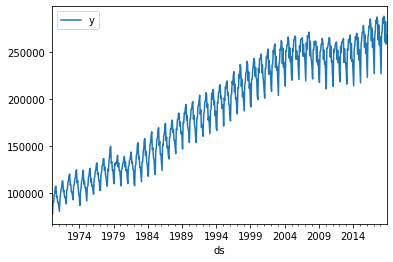

In [33]:
df.plot(x='ds', y='y')

In [34]:
train = df.iloc[:576]
test = df.iloc[576:]

In [35]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
forecast.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
576,2018-01-01,262438.915080,238200.109771,249626.873748,262438.915080,262438.915080,-18588.461143,-18588.461143,-18588.461143,-18588.461143,-18588.461143,-18588.461143,0.0,0.0,0.0,243850.453937
577,2018-02-01,262581.030416,229514.717976,241360.558942,262581.030416,262581.030416,-27100.441623,-27100.441623,-27100.441623,-27100.441623,-27100.441623,-27100.441623,0.0,0.0,0.0,235480.588794
578,2018-03-01,262709.392655,257059.743543,268418.172926,262709.392655,262709.392655,-26.118264,-26.118264,-26.118264,-26.118264,-26.118264,-26.118264,0.0,0.0,0.0,262683.274392
579,2018-04-01,262851.507991,257664.121894,269049.003124,262851.507991,262851.507991,34.728408,34.728408,34.728408,34.728408,34.728408,34.728408,0.0,0.0,0.0,262886.236399
580,2018-05-01,262989.038962,266947.845863,278343.986674,262988.272772,262989.038962,9620.483640,9620.483640,9620.483640,9620.483640,9620.483640,9620.483640,0.0,0.0,0.0,272609.522601
581,2018-06-01,263131.154298,267109.747887,278792.979642,263115.692032,263131.154298,9731.461002,9731.461002,9731.461002,9731.461002,9731.461002,9731.461002,0.0,0.0,0.0,272862.615300
582,2018-07-01,263268.685268,273733.365812,285418.391846,263223.525453,263268.685268,16053.155833,16053.155833,16053.155833,16053.155833,16053.155833,16053.155833,0.0,0.0,0.0,279321.841101
583,2018-08-01,263410.800604,274039.891520,285408.450991,263341.925860,263425.033627,16448.013049,16448.013049,16448.013049,16448.013049,16448.013049,16448.013049,0.0,0.0,0.0,279858.813654
584,2018-09-01,263552.915940,256487.548000,267933.477993,263451.529813,263593.289839,-1670.418537,-1670.418537,-1670.418537,-1670.418537,-1670.418537,-1670.418537,0.0,0.0,0.0,261882.497404
585,2018-10-01,263690.446911,263679.166322,274870.000758,263541.368032,263756.625938,5305.505873,5305.505873,5305.505873,5305.505873,5305.505873,5305.505873,0.0,0.0,0.0,268995.952784


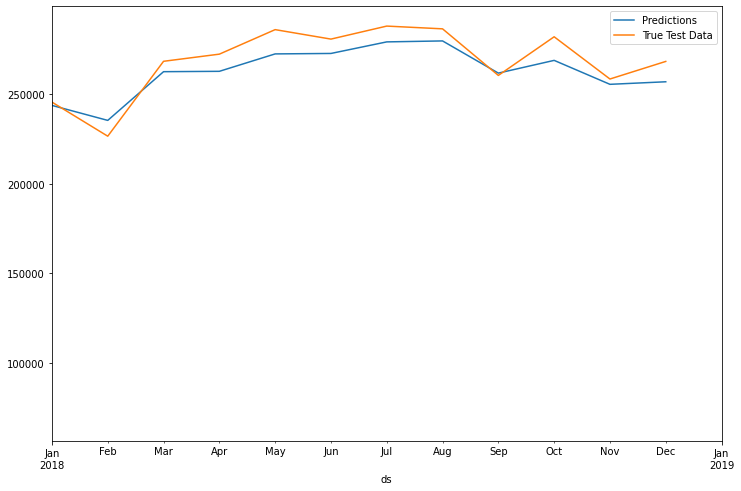

In [38]:
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True, figsize=(12,8))
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2018-01-01', '2019-01-01'))

In [39]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-12:]['yhat']

In [41]:
rmse(predictions, test['y'])

8618.783155559411

In [42]:
test.mean()

y    268739.666667
dtype: float64

In [43]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [46]:
initial = 5 * 365
initial = str(initial) + ' days'

period = 5 * 365
period = str(period) + ' days'

horizon = 365
horizon = str(horizon) + ' days'

In [51]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [52]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087306,107094.681028,109907.658299,102445.0,1976-12-11
1,1977-02-01,102996.111502,101437.062711,104511.227226,102416.0,1976-12-11
2,1977-03-01,118973.317944,117594.433530,120349.959599,119960.0,1976-12-11
3,1977-04-01,120612.923539,119094.973013,122089.114474,121513.0,1976-12-11
4,1977-05-01,127883.031663,126343.411025,129376.395109,128884.0,1976-12-11


In [54]:
df_p = performance_metrics(df_cv)

In [55]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.402227e+07,4901.251892,4506.384371,0.027631,0.023593,0.4
1,53 days,2.150811e+07,4637.683407,4238.662732,0.024863,0.023593,0.4
2,54 days,1.807689e+07,4251.692535,3708.943275,0.019933,0.022278,0.5
3,55 days,2.298205e+07,4793.960154,4236.275244,0.023042,0.023593,0.4
4,57 days,2.078937e+07,4559.535784,3972.087270,0.021317,0.022278,0.5


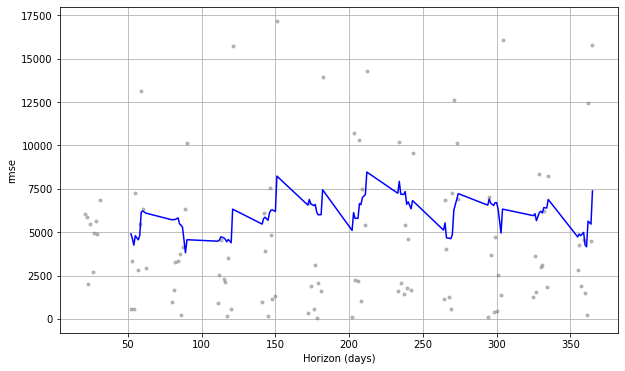

In [58]:
plot_cross_validation_metric(df_cv, metric='rmse');